Importar as bibliotecas que serão utilizadas

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
import statistics as stc
from scipy import stats
import statsmodels.api as sm
import pylab as py
from distfit import distfit
import math
import random
import datetime

Importar os dados das medições do arquivo .csv

In [2]:
data = pd.read_csv('D:\Documentos\Cursos\Mestrado\Probabilidade e Processos Estocásticos\Testes Python\_LBNL_a6_bus1_2015-10-01.csv') 

Adicionar coluna Horário no dataframe, com valores que vão de 0 a 23

In [3]:
# if(data['Unnamed']):
#         data.drop(['Unnamed'])
data['Horario'] = 0
mHoraria = len(data)/24
data['Time'][0:int(mHoraria)]
n = 0
for i in range(0,24):
    data[int(len(data)/24*i):int(len(data)/24*(i+1))]['Horario'] = i
    n += 1
 

data

,Unnamed: 0,Time,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3,Events,Horario
0,0,1.443658e+18,7469.341309,7471.521973,7502.064941,357.882660,238.087585,117.906738,17.962173,23.941633,22.525549,331.211426,217.019165,83.222740,0.0,0
1,1,1.443658e+18,7469.608398,7471.703613,7502.192383,357.923859,238.127411,117.947227,17.919218,23.878366,22.482040,331.182648,217.118896,83.163498,0.0,0
2,2,1.443658e+18,7469.810059,7471.809570,7502.267090,357.964386,238.167465,117.988358,17.974640,23.824940,22.474831,331.134674,217.293427,83.222931,0.0,0
3,3,1.443658e+18,7469.842773,7471.927734,7502.214844,358.002319,238.206512,118.026810,18.037073,23.916128,22.507301,331.074158,217.476486,83.319588,0.0,0
4,4,1.443658e+18,7469.822266,7472.120605,7502.244141,358.040131,238.245026,118.063675,18.042921,24.034710,22.512310,331.187775,217.613770,83.421730,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10367995,10367995,1.443744e+18,7449.165039,7456.950684,7480.336426,246.722046,126.890938,6.705578,19.834072,25.779219,24.732191,219.673431,106.065033,332.553558,0.0,23
10367996,10367996,1.443744e+18,7449.188477,7456.961914,7480.250000,246.876434,127.044991,6.860225,19.964079,25.828913,24.654770,220.252289,105.900620,332.800079,0.0,23
10367997,10367997,1.443744e+18,7449.098633,7456.850586,7480.319336,247.028961,127.198547,7.013916,20.117683,25.952682,24.562939,220.646881,105.807594,333.065369,0.0,23
10367998,10367998,1.443744e+18,7448.999512,7456.692871,7480.238281,247.181381,127.351089,7.167124,20.179417,25.919607,24.514606,220.681915,105.968452,333.106323,0.0,23


Cáculo do desequilíbrio de tensão K

In [4]:
beta = ((abs(data['VL1']))**4 + (abs(data['VL2']))**4 + (abs(data['VL3']))**4 )/( (abs(data['VL1']))**2 + (abs(data['VL2']))**2 + (abs(data['VL3']))**2)**2
K = 0
K = np.sqrt((1-np.sqrt(3-6*beta))/(1 + np.sqrt(3-6*beta)))*100

Gráfico do desequilíbrio de tensão. Sinal original e sinal filtrado com média móvel

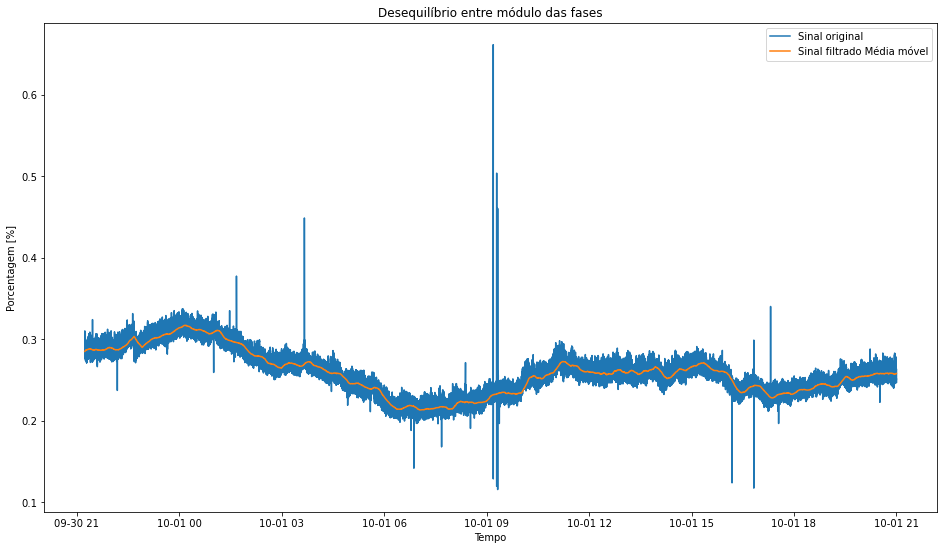

In [5]:
time = []
for i in data['Time']:
    time.append(datetime.datetime.fromtimestamp(int(str(int(i))[0:10])))
             

M = 100000
n=0


y_maf = np.zeros(len(K))
for i in range(0,len(K)):
    if i >= M:
        y_maf[i] = y_maf[i-1] + (1/M)*(K[i] - K[i-M])
    else:
        y_maf[i] = y_maf[i-1] + (1/M)*(K[i])


plt.figure(figsize = [16,9])

plt.plot(time[100000:],K[100000:],label='Sinal original')
plt.plot(time[100000:],y_maf[100000:],label='Sinal filtrado Média móvel')

plt.xlabel('Tempo')
plt.ylabel('Porcentagem [%]')
plt.title('Desequilíbrio entre módulo das fases')
plt.legend()
plt.show()

Cálculo do ruído do sinal

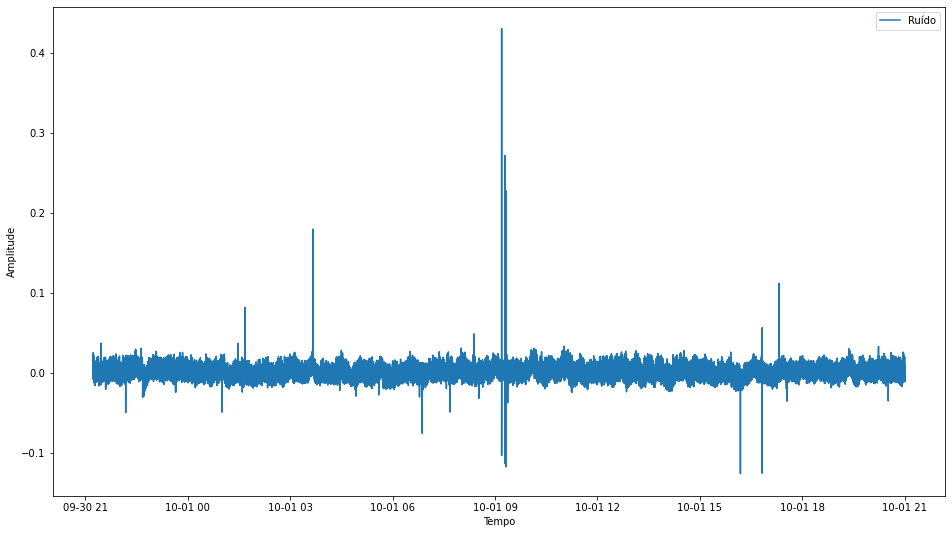

In [7]:
dif = K - y_maf 
plt.figure(figsize = [16,9])

plt.plot(time[100000:],dif[100000:],label='Ruído')

plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.legend()


Dataframde do desequilíbrio de tensão ordenado temporalmente

In [8]:
dfteste = pd.DataFrame(K,columns=['Desequilíbrio de tensão (%)'])
dfteste['Tempo'] = time

dfteste

,Desequilíbrio de tensão (%),Tempo
0,0.282599,2015-09-30 21:00:00
1,0.281690,2015-09-30 21:00:00
2,0.280939,2015-09-30 21:00:00
3,0.279837,2015-09-30 21:00:00
4,0.279427,2015-09-30 21:00:00
...,...,...
10367995,0.251159,2015-10-01 20:59:59
10367996,0.250236,2015-10-01 20:59:59
10367997,0.251673,2015-10-01 20:59:59
10367998,0.251982,2015-10-01 20:59:59


Plot Boxplot:
Sinal original,
Sinal filtrado pelo média móvel,
ruído

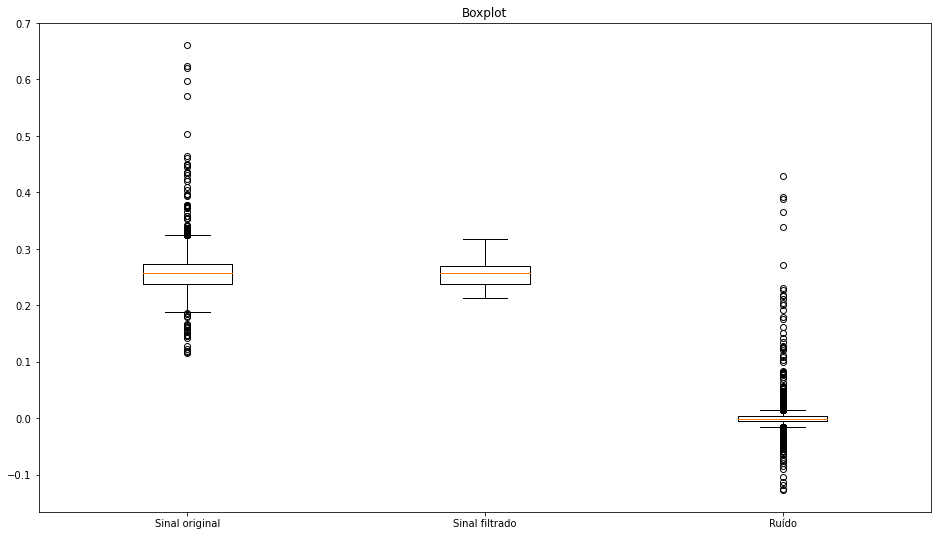

In [70]:
data = [K, y_maf[100000:], dif[100000:]]
fig7, ax7 = plt.subplots(figsize = [16, 9])
ax7.set_title('Boxplot')
ax7.boxplot(data)
ax7.set_xticklabels(['Sinal original', 'Sinal filtrado', 'Ruído'])
plt.show()

Plot da autocorrelação e autocorrelação parcial do sinal filtrado do desequilíbrio de tensão

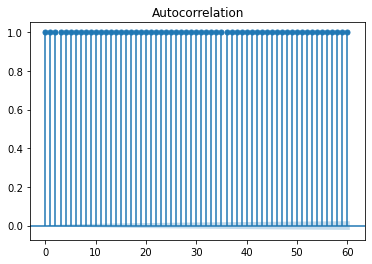

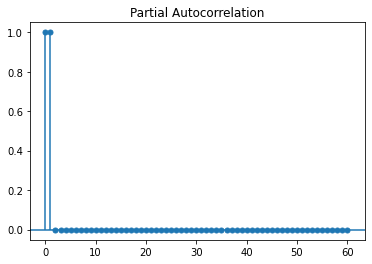

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_maf[100000:1000000])  
plot_pacf(y_maf[100000:1000000])  
plt.show()

In [14]:
mean = np.mean(dif[100000:],axis=0)
sd = np.std(dif[100000:], axis=0)

mean,sd #

(-0.00014239645817361673, 0.005850112059494008)

Modelo autoregressivo

X_t+1 = a*X_t + b*W_t+1 + c

Coeficientes do modelo autoregressivo

In [45]:
rho, sigma = yule_walker(K, 1, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.99896919]
sigma: 0.0012197798571691918


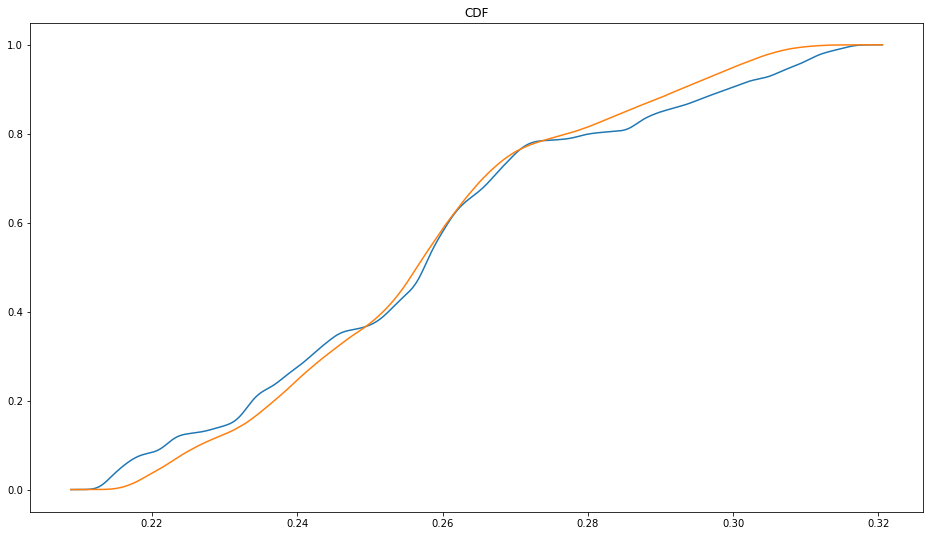

In [95]:
count, bins_count = np.histogram(y_maf2[100000:], bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

count, bins_count = np.histogram(saida[100000:], bins=1000)
pdf = count / sum(count)
cdf1 = np.cumsum(pdf)

plt.figure(figsize = [16, 9])
plt.title('CDF Ruído')
plt.plot(bins_count[1:], cdf1, label="CDF")
plt.title('CDF')


plt.plot(bins_count[1:], cdf, label="CDF")


Ruido sem outliers

In [65]:
ruido_semoutlier = np.zeros(len(dif))
for i in range(0,len(dif)):
    if((dif[i] < -0.05) or (dif[i] > 0.05)):
        ruido_semoutlier[i] = 0 
    else:   
        ruido_semoutlier[i] = dif[i]  

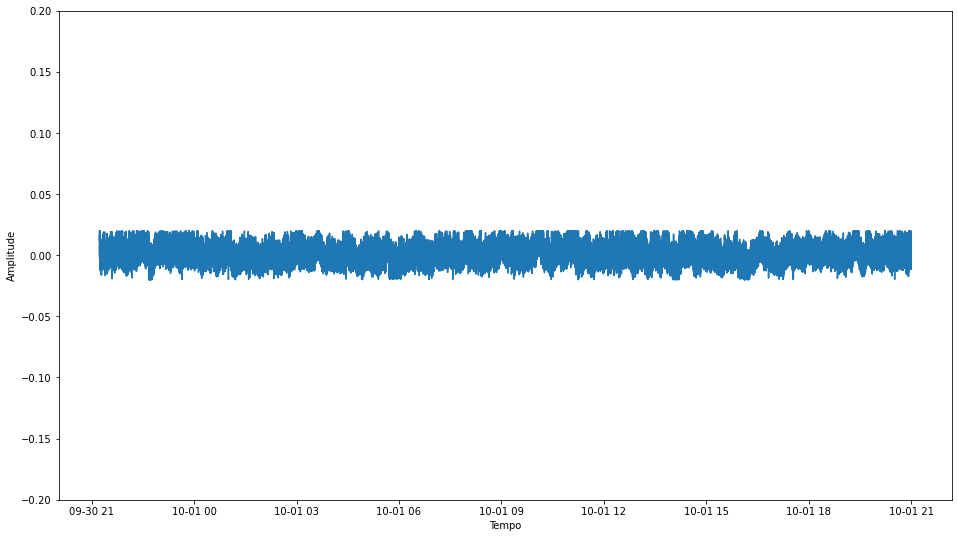

In [13]:
plt.figure(figsize = [16, 9])
plt.ylim([-0.2, 0.2])
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.plot(time[100000:],ruido_semoutlier[100000:])

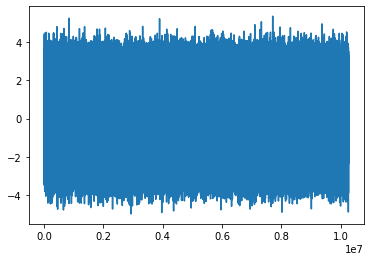

In [70]:
valormedio = 0.0
desviopadrao = 1
numeropontos = len(y_maf[100000:])
 
ruido= np.random.normal(loc=valormedio, scale=desviopadrao, size=numeropontos)
 
plt.plot(ruido)
plt.show()

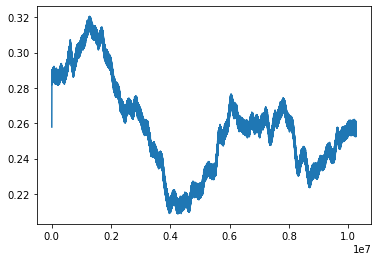

In [94]:
A = 0.99896919
A2 = 0
A3 = 0
A4 = 0
B =0.001

C = 0
saida = np.zeros(len(y_maf[100000:]))

for i in range(0,len(y_maf[100000:])):
    saida[i] = A*y_maf[100000:][i-1]  + B*ruido[i] + C
saida
plt.plot(saida)

Teste utilizando a função distfit para aproximar a distribuição do ruído

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.06 sec] [RSS: 86.0015449] [loc=-0.000 scale=0.006]
[distfit] >[expon     ] [0.03 sec] [RSS: 22221.0903060] [loc=-0.050 scale=0.050]
[distfit] >[pareto    ] [183. sec] [RSS: 21447.9924105] [loc=-0.116 scale=0.084]
[distfit] >[dweibull  ] [119. sec] [RSS: 219.3275708] [loc=-0.000 scale=0.005]
[distfit] >[t         ] [134. sec] [RSS: 80.7578697] [loc=-0.000 scale=0.006]
[distfit] >[genextreme] [470. sec] [RSS: 5916.7066722] [loc=-0.000 scale=0.011]
[distfit] >[gamma     ] [120. sec] [RSS: 17.6152120] [loc=-0.077 scale=0.000]
[distfit] >[lognorm   ] [224. sec] [RSS: 15.4643481] [loc=-0.110 scale=0.110]
[distfit] >[beta      ] [293. sec] [RSS: 16.4995644] [loc=-0.072 scale=1.844]
[distfit] >[uniform   ] [0.01 sec] [RSS: 19630.5490870] [loc=-0.050 scale=0.099]
[distfit] >[loggamma  ] [224. sec] [RSS: 102.1694962] [loc=-1.317 scale=0.190]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


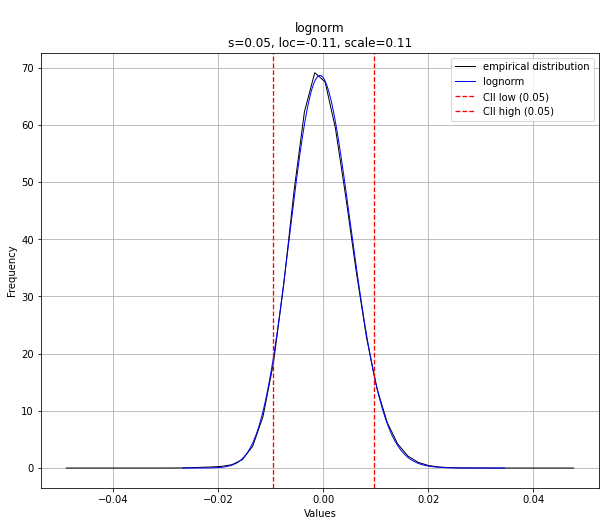

[distfit] >plot summary..


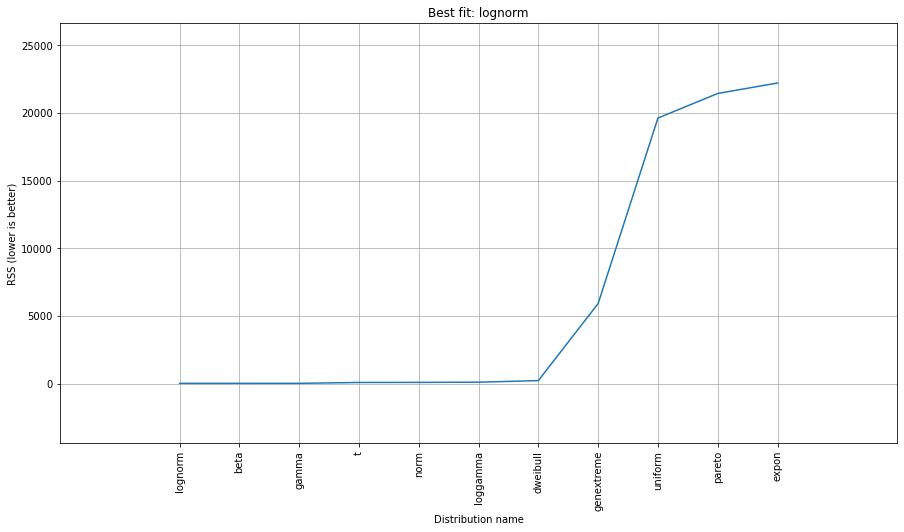

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: lognorm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [104]:
dist = distfit()
# Search for best theoretical fit on your emperical data
dist.fit_transform(ruido_semoutlier[100000:])
# Plot
dist.plot()
# summay plot
dist.plot_summary()

Plot QQ para o ruido

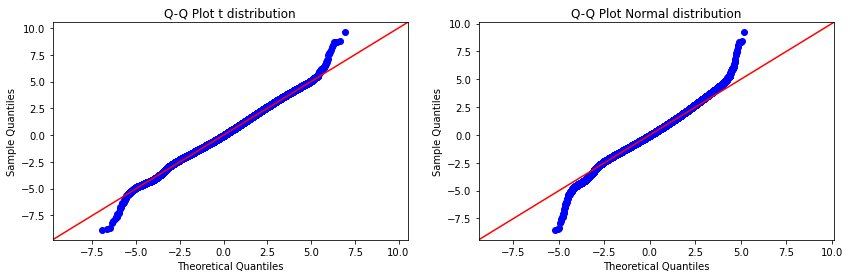

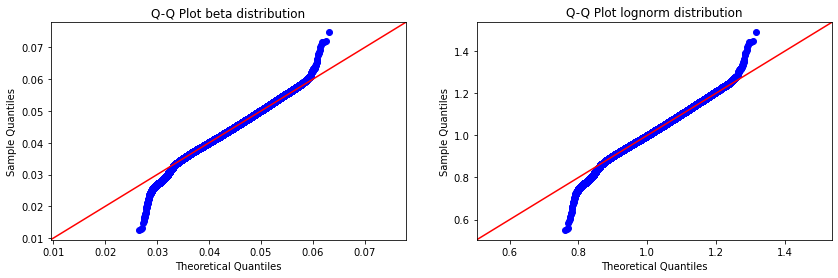

In [19]:
#teste para hora 22(19)
from scipy.stats import lognorm
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import t
mu = sum(ruido_semoutlier[100000:])/len(ruido_semoutlier[100000:])

fig, ax = plt.subplots(1,2, figsize=(14, 4))
fig2, ax2 = plt.subplots(1,2, figsize=(14, 4))
normal = sm.ProbPlot(ruido_semoutlier[100000:], dist=norm, loc=mu, fit=True)
tdistr = sm.ProbPlot(ruido_semoutlier[100000:], dist=t, loc=mu,  fit=True)
lognorm = sm.ProbPlot(ruido_semoutlier[100000:], dist=lognorm, loc=mu,  fit=True)
beta = sm.ProbPlot(ruido_semoutlier[100000:], dist=beta, loc=mu,  fit=True)

normal.qqplot(line='45', ax=ax[1])
tdistr.qqplot(line='45', ax=ax[0])
lognorm.qqplot(line='45', ax=ax2[1])
beta.qqplot(line='45', ax=ax2[0])
ax[1].set_title('Q-Q Plot Normal distribution')
ax[0].set_title('Q-Q Plot t distribution')
ax2[1].set_title('Q-Q Plot lognorm distribution')
ax2[0].set_title('Q-Q Plot beta distribution')
plt.show()

Média e desvio padrão do desequilíbrio de tensão

In [84]:
mean = np.mean(y_maf[100000:],axis=0)
sd = np.std(y_maf[100000:], axis=0)

mean,sd #

(0.2583118125456827, 0.026431904289008542)

PDF e CDF do ruído sem outliers

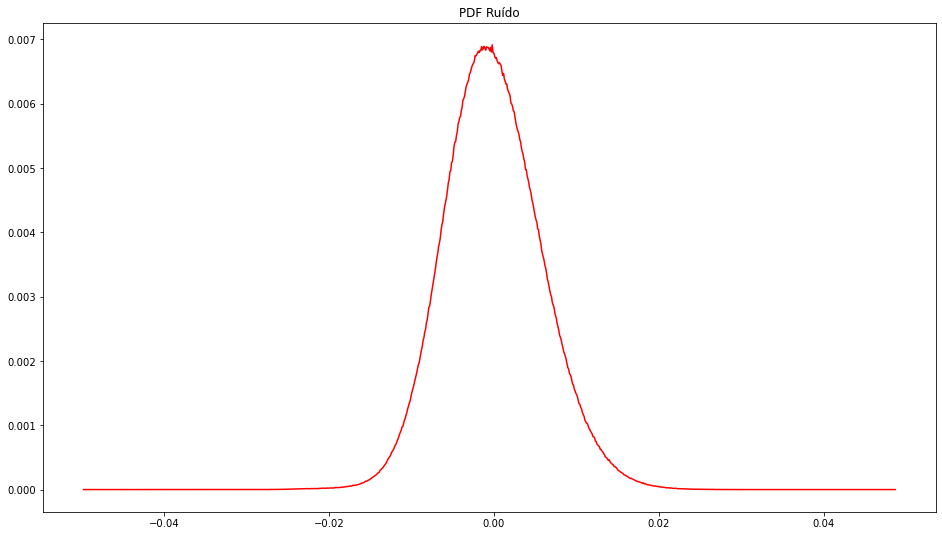

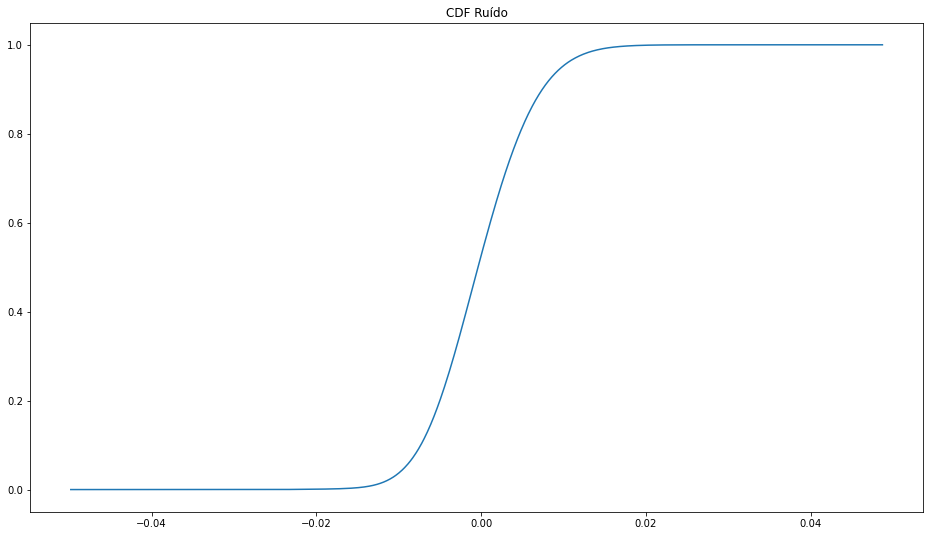

In [68]:
count, bins_count = np.histogram(ruido_semoutlier[100000:], bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize = [16, 9])
plt.title('PDF Ruído')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot()

plt.figure(figsize = [16, 9])
plt.title('CDF Ruído')
plt.plot(bins_count[1:], cdf, label="CDF")